### 📈 Goal:
Simulate the daily price movement of a stock over time using a random walk or Geometric Brownian Motion (GBM).

### Step 1: Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### Step 2: Define Parameters

In [2]:
initial_price = 100     # Starting stock price
days = 200              # Simulate 200 trading days (~10 months)
volatility = 2          # Daily volatility (price can move ±2%)


### Step 3: Simulate Price Changes (Random Walk)

In [3]:
# Daily returns: % change from previous day
daily_returns = np.random.normal(loc=0.0, scale=volatility / 100, size=days)

# Calculate price path
price_path = initial_price * np.cumprod(1 + daily_returns)


### Step 4: Plot the Stock Price


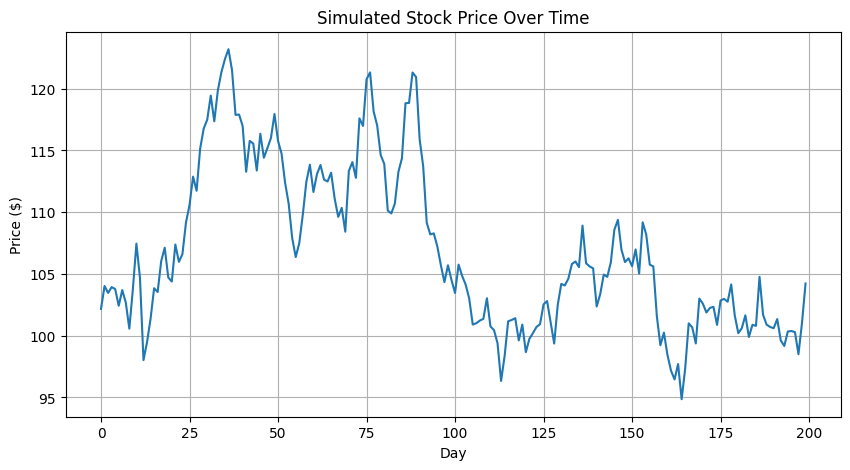

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(price_path)
plt.title("Simulated Stock Price Over Time")
plt.xlabel("Day")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()


### Step 5: Add Simple Statistics

In [5]:
print("Start Price: $", round(initial_price, 2))
print("End Price: $", round(price_path[-1], 2))
print("Max Price: $", round(np.max(price_path), 2))
print("Min Price: $", round(np.min(price_path), 2))

Start Price: $ 100
End Price: $ 104.23
Max Price: $ 123.2
Min Price: $ 94.86


### Optional: Use Geometric Brownian Motion (More Realistic)

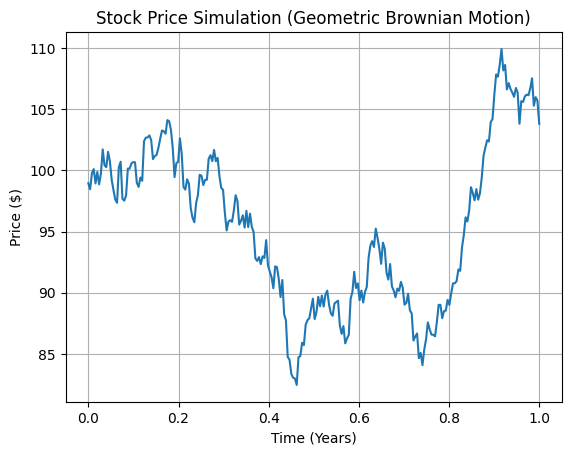

In [6]:
def simulate_gbm(S0, mu, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)  # Brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return t, S

# Simulate 1 year (T=1), 252 trading days
t, gbm_prices = simulate_gbm(100, mu=0.1, sigma=0.2, T=1, N=252)

# Plot
plt.plot(t, gbm_prices)
plt.title("Stock Price Simulation (Geometric Brownian Motion)")
plt.xlabel("Time (Years)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()
